In [1]:
import chess
from stockfish import Stockfish
import re
import requests
from ollama import chat
from ollama import ChatResponse
import json
import random
import pandas as pd


In [2]:
stockfish = Stockfish()

In [40]:
# URL to scrape the text from.
url = "https://wtharvey.com/ap20.html"

# Download the text from the website.
response = requests.get(url)
if response.status_code == 200:
    text = response.text
else:
    print(f"Failed to retrieve content. Status code: {response.status_code}")
    text = ""

# Regular expression pattern for matching FEN strings.
fen_pattern = re.compile(
    r'([prnbqkPRNBQK\d/]+\s+[w]\s+(?:K?Q?k?q?|-)\s+(?:[a-h][36]|-)\s+\d+\s+\d+)'
)

# Find all FEN notations in the text.
fen_notations = fen_pattern.findall(text)

# Print the extracted FEN notations.
print("Extracted FEN Notations:")
# for fen in fen_notations:
#     print(fen)

print(fen_notations[:3])

print(len(fen_notations))




Extracted FEN Notations:
['r1b1k2r/pp1n1ppp/2n1p3/2bpP3/5B2/2NB1N2/PqPQ1PPP/R3K2R w KQkq - 1 0', '4rk1r/pp2q3/3p1p2/4nP2/4PQ1P/1B1p4/PPP5/2K3R1 w - - 1 0', '2k3r1/1pp4p/p3p1q1/8/4n1Q1/1BP5/PP4PK/5R2 w - - 1 0']
46


In [41]:
fen_notations_ten = fen_notations[:10]

len(fen_notations_ten)

10

In [17]:
file_path = r"E:\GitHub\Chess-Research-Project\puzzles_code\puzzles\wtharvey_puzzles_only.txt"

with open(file_path, "w") as file:
    for item in fen_notations:
        file.write(item + "\n")

In [5]:
stockfish.set_fen_position(fen_notations_ten[0])

best_move = stockfish.get_best_move()
best_move_eval = stockfish.get_evaluation()

print(best_move_eval)
print(best_move)

{'type': 'cp', 'value': 676}
d8e8


In [8]:
def get_random_move(board:chess.Board, fen:str, seed: int = 101):
    legal_moves = [
        board.san(move)
        for move in board.legal_moves
    ]

    random.seed(seed)

    # print(random.choice(legal_moves))
    return random.choice(legal_moves)

    # print(legal_moves[0])

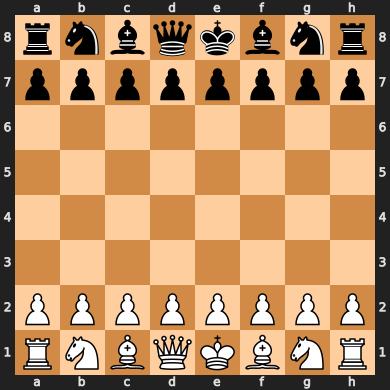

In [144]:
board = chess.Board()

board


Rh7


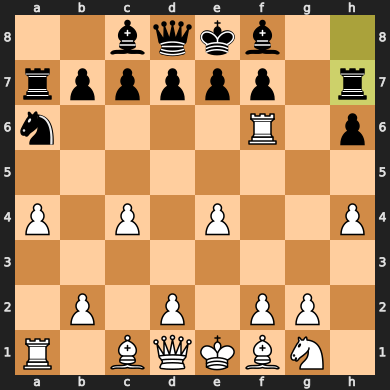

In [139]:
random_move = get_random_move(board, fen=fen_notations_ten[0], seed=2)

print(random_move)

board.push_san(random_move)
# board.parse_san(random_move)

board

In [5]:
fen = fen_notations_ten[0]

print(f"Position: {fen}")

board_stockfish = chess.Board(fen=fen)
board_random = chess.Board(fen=fen)

assert board_random == board_stockfish, "Two boards are not equal"

stockfish.set_fen_position(fen_position=fen)

best_move = stockfish.get_best_move()

board_stockfish.push(chess.Move.from_uci(best_move))
stockfish.set_fen_position(fen_position=board_stockfish.fen())
best_eval = stockfish.get_evaluation()  # evaluation in centipawns (or mate score)
            
# print(f"Stockfish best move: {best_move} with evaluation: {best_eval}")
if best_eval["type"] == "mate":
    break

random_move = get_random_move(board_random, fen, seed=i)

            try:
                board_random.push_san(random_move)
            except Exception as e:
                print(f"Exception captured: {type(e)}")

            stockfish.set_fen_position(fen_position=board_random.fen())
            provided_eval = stockfish.get_evaluation()

            if provided_eval["type"] == "mate":
                print("ITERATION SKIPPED")
                continue

            score_difference = abs(best_eval["value"]) - abs(provided_eval["value"])

            print(f"Stockfish best move: {best_move} with evaluation: {best_eval["value"]}")
            print(f"Random move: {random_move} with evaluation: {provided_eval["value"]}")

IndentationError: unexpected indent (4050511260.py, line 22)

In [21]:
fen = fen_notations_ten[0]

board = chess.Board(fen=fen)

# print(board)

board.push_uci("d8e8")

stockfish.set_fen_position(board.fen())

eval = stockfish.get_evaluation()

print(f"Stockfish: {eval}")

board.pop()

board.push_uci("d8a8")

stockfish.set_fen_position(board.fen())

eval = stockfish.get_evaluation()

print(f"Random move: {eval}")

# print(board)

Stockfish: {'type': 'cp', 'value': 687}
Random move: {'type': 'cp', 'value': -737}


In [10]:
fen = "rnbqkbnr/p1pppppp/8/1p6/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2"

board = chess.Board(fen=fen)

stockfish.set_fen_position(fen)


print(stockfish.get_evaluation())

board

moves = stockfish.get_top_moves(3)

print(moves)

{'type': 'cp', 'value': 178}
[{'Move': 'f1b5', 'Centipawn': 181, 'Mate': None}, {'Move': 'd2d4', 'Centipawn': 129, 'Mate': None}, {'Move': 'g1f3', 'Centipawn': 75, 'Mate': None}, {'Move': 'a2a4', 'Centipawn': 69, 'Mate': None}]


In [44]:
for fen in fen_notations:
    board = chess.Board(fen=fen)

    stockfish.set_fen_position(fen)

    moves = stockfish.get_top_moves(1)

    print(moves)
    

[{'Move': 'a1b1', 'Centipawn': 315, 'Mate': None}]
[{'Move': 'f4h6', 'Centipawn': None, 'Mate': 2}]
[{'Move': 'g4e6', 'Centipawn': 706, 'Mate': None}]
[{'Move': 'b5d3', 'Centipawn': 411, 'Mate': None}]
[{'Move': 'd3e5', 'Centipawn': 301, 'Mate': None}]
[{'Move': 'f3d4', 'Centipawn': 373, 'Mate': None}]
[{'Move': 'g4e6', 'Centipawn': 457, 'Mate': None}]
[{'Move': 'c5c6', 'Centipawn': 342, 'Mate': None}]
[{'Move': 'f7f8', 'Centipawn': 437, 'Mate': None}]
[{'Move': 'c3e4', 'Centipawn': 353, 'Mate': None}]
[{'Move': 'd1g1', 'Centipawn': 354, 'Mate': None}]
[{'Move': 'd1e1', 'Centipawn': 296, 'Mate': None}]
[{'Move': 'e3a7', 'Centipawn': 466, 'Mate': None}]
[{'Move': 'd4f5', 'Centipawn': 390, 'Mate': None}]
[{'Move': 'e3g5', 'Centipawn': 377, 'Mate': None}]
[{'Move': 'd3g6', 'Centipawn': None, 'Mate': 3}]
[{'Move': 'g8f7', 'Centipawn': 501, 'Mate': None}]
[{'Move': 'e7f5', 'Centipawn': 405, 'Mate': None}]
[{'Move': 'f6h8', 'Centipawn': None, 'Mate': 3}]
[{'Move': 'e1e7', 'Centipawn': 328, '

In [15]:
csv_file = "/Users/nafis-mac/GitHub Repos/Chess-Research-Project/datasets/random_evals.csv"

df = pd.read_csv(csv_file, nrows=20000, usecols=["FEN"])

pattern = r'([prnbqkPRNBQK\d/]+\s+[w]\s+(?:K?Q?k?q?|-)\s+(?:[a-h][36]|-)\s+\d+\s+\d+)'

white_fen = df[df['FEN'].str.contains(pattern, regex=True)]['FEN']

white_fen = white_fen.reset_index(drop=True)

print(white_fen.to_string(index=False))

white_fen.to_csv('filtered_fen.csv', index=False, header=True)

rnbqkbnr/p1pppppp/8/1p6/4P3/8/PPPP1PPP/RNBQKBNR...
rnbqkbnr/ppppp1pp/8/5p2/4P3/8/PPPP1PPP/RNBQKBNR...
rnbqkbnr/1ppppppp/p7/8/4P3/8/PPPP1PPP/RNBQKBNR ...
rnbqkbnr/p1pppppp/1p6/8/4P3/8/PPPP1PPP/RNBQKBNR...
rnbqkbnr/ppppp1pp/5p2/8/4P3/8/PPPP1PPP/RNBQKBNR...
rnbqkbnr/ppppppp1/7p/8/4P3/8/PPPP1PPP/RNBQKBNR ...
rnbqkbnr/pppppp1p/8/6p1/4P3/8/PPPP1PPP/RNBQKBNR...
rnbqkbnr/ppppppp1/8/7p/4P3/8/PPPP1PPP/RNBQKBNR ...
rnbqkb1r/pppppppp/7n/8/4P3/8/PPPP1PPP/RNBQKBNR ...
rnbqkbnr/1ppppppp/8/p7/4P3/8/PPPP1PPP/RNBQKBNR ...
r1bqkbnr/pppppppp/n7/8/4P3/8/PPPP1PPP/RNBQKBNR ...
r1bqkb1r/pppppppp/n4n2/4P3/8/8/PPPP1PPP/RNBQKBN...
rnbqkbr1/pppppppp/5n2/4P3/8/8/PPPP1PPP/RNBQKBNR...
rnbqkb1r/ppppppp1/5n1p/4P3/8/8/PPPP1PPP/RNBQKBN...
r1bqkb1r/pppppppp/2n2n2/4P3/8/8/PPPP1PPP/RNBQKB...
rnbqkb1r/pppppppp/8/4P3/6n1/8/PPPP1PPP/RNBQKBNR...
rnbqkb1r/pppppp1p/5np1/4P3/8/8/PPPP1PPP/RNBQKBN...
rnbqkb1r/pppppppp/8/4P2n/8/8/PPPP1PPP/RNBQKBNR ...
rnbqkb1r/pp1ppppp/2p2n2/4P3/8/8/PPPP1PPP/RNBQKB...
rnbqkb1r/ppppppp1/5n2/4P2p/8/8/

/var/folders/dp/yh7v9fbd5bg15mn96lsbc61w0000gn/T/ipykernel_69317/2191590484.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  white_fen = df[df['FEN'].str.contains(pattern, regex=True)]['FEN']
